<a href="https://colab.research.google.com/github/crazat/crazat.githurb.io/blob/main/%ED%8F%89%EA%B0%80%EC%A7%80%ED%91%9C_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- 편의상 실습과정에서 사이킷런의 데이터셋을 받와서 실습을 진행함
- 테스트 데이터는 별도로 존재한다고 가정하고 검증데이터를 분리해서 검증데이터에 대해서만 평가를 진행하는 방식으로 실습

# 모델 성능 평가 지표(Metirc)
- 실제값과 모델에 의해 예측된 값을 비교하여 모델의 성능을 측정 하는 것

- 모델 평가의 목적


# 회귀문제 성능 측정

## 사이킷런에서 제공해주는 데이터셋
- 당뇨병 진행도 예측 데이터셋 받아오기

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes

train, target = load_diabetes(return_X_y=True, as_frame=True)
train.shape , target.shape

((442, 10), (442,))

In [ ]:
train.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB


In [ ]:
target

,target
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0
...,...
437,178.0
438,104.0
439,132.0
440,220.0


In [ ]:
target.min() , target.max()

(25.0, 346.0)

## 학습셋과 검증셋 분리

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(train, target, random_state=42) # test_size 기본값은 0.25

x_train.shape , x_valid.shape , y_train.mean() , y_valid.mean()

((331, 10), (111, 10), 154.34441087613294, 145.54054054054055)

## Linear Regression 학습 및 예측

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train) # 학습
pred = model.predict(x_valid) # 예측
pred

array([137.94908878, 182.533354  , 129.85295373, 292.5630923 ,
       124.86788221,  89.73883143, 255.95872903, 177.64545905,
        87.8884795 , 107.93961905,  93.26357149, 171.11939483,
        56.06305218, 207.22146277,  99.78918734, 131.7128101 ,
       215.86378125, 252.18591603, 201.56577486, 220.38870357,
       204.35745939,  88.9068622 ,  68.52958146, 190.02378425,
       153.91270751, 164.02719031, 192.83227597, 187.16765226,
        46.60570802, 109.3112624 , 175.04965912,  87.8076198 ,
       130.37646375, 186.56325253, 172.4733248 , 188.61448165,
       124.07175323, 119.16132637, 147.74400127,  59.27254049,
        70.90046253, 109.30036497, 170.97191153, 156.56943489,
       168.68664924,  61.5457612 ,  71.19039454, 111.94779801,
        54.32009551, 165.81267886, 152.78043565,  63.80587155,
       110.07651605, 108.64317139, 179.16381014, 156.79651896,
        93.29011121, 212.91986757, 119.28417849,  70.70890653,
       186.678156  , 205.65720098, 140.02890626, 106.54

## 회귀 평가 지표

### MSE(Mean Squared Error)
- 실제 값과 예측 값의 차이를 제곱한 뒤 평균화
- 이상치에 민감
- 직관적이지 못하다.
$$
MSE = \frac{1}{n}{\sum_{i=1}^{n}(y_i-\hat{y}_i)^2}
$$


In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_valid,pred)
mse # 손실함수로 많이 사용

2848.3106508475057

### RMSE(Root Mean Squared Error)
- MSE에 루트
- 이상치에 민감
$$
RMSE = \sqrt{\frac{1}{n}{\sum_{i=1}^{n}(y_i-\hat{y}_i)^2}}
$$

In [ ]:
np.sqrt(mse) , mse ** 0.5 # 루트

(53.369566710321955, 53.369566710321955)

### MAE(Mean Absolute Error)
- 실제 값과 예측 값의 차이를 절대값으로 변환해 평균화
$$
MAE = \frac{1}{n}{\sum_{i=1}^{n}|y_i-\hat{y}_i|}
$$

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_valid,pred)

41.54850685988061

### MAPE(Mean Absolute Percentage Error)
- 실제값에대한 절대오차 비율의 평균을 퍼센트로 표현
- MAE를 퍼센트로 표현
$$
MAPE = \frac{100}{n}{\sum_{i=1}^{n}\frac{|y_i-\hat{y}_i|}{|y|}}
$$

In [ ]:
def mape(true, pred):
	return np.mean(np.abs((true - pred) / np.abs(true)))   # 100(상수) 곱하는거는 생략
mape(y_valid, pred)

0.37310970433744683

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_valid,pred)

0.37310970433744683

# 분류문제 성능 측정

## 사이킷런에서 제공해주는 데이터셋
- 0~9 손글씨 이미지 받아오기

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits() # 아규먼트 주지 않을 경우

In [ ]:
digits # 안에 내용 확인해보기

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

- data 속성에는 이미지 데이터
- 8 X 8 크기의 이미지가 flatten 되어있음

In [ ]:
train = digits.data
train.shape

(1797, 64)

- target 속성에는 정답값

In [ ]:
target = digits.target
target.shape

(1797,)

- 이미지 형태로 reshape 해보기

In [ ]:
train[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [ ]:
train[0].reshape(8,8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

- 이미지 시각화

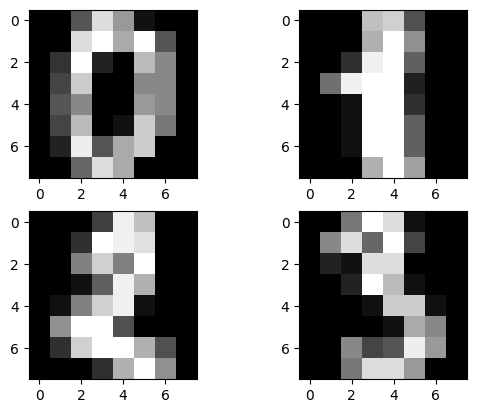

In [ ]:
import matplotlib.pyplot as plt
fig ,ax = plt.subplots(2,2)
ax[0,0].imshow(train[0].reshape(8,8), cmap='gray')
ax[0,1].imshow(train[1].reshape(8,8), cmap='gray')
ax[1,0].imshow(train[2].reshape(8,8), cmap='gray')
ax[1,1].imshow(train[3].reshape(8,8), cmap='gray')
plt.show()

## 숫자 3을 맞추는 문제로 재정의
- 숫자 3을 1로 변경하고, 나머지를 0으로 정답값을 재정의하여 불균형 데이터 생성


In [ ]:
target = (target == 3).astype(int)
target

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
target.mean()

0.1018363939899833

## 학습셋과 검증셋 분리

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(train, target, random_state=42) # test_size 기본값은 0.25

x_train.shape , x_valid.shape , y_train.mean() , y_valid.mean()

((1347, 64), (450, 64), 0.10170749814402376, 0.10222222222222223)

## 혼동 행렬(Confusion Matrix)
- 이진 분류에서 성능지표로 활용되는 행렬이다
- 이진 분류에서 예측 오류가 어느정도 되는지와 어떠한 유형의 예측 오류가 발생하는지 나타내는 지표


- Dummy

In [ ]:
# Class 중에 무조건 다수인 것으로 예측
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(x_train, y_train) # 학습
pred_dummy = dummy.predict(x_valid) # 예측결과 저장
pred_dummy.mean()

0.0

- Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=700,random_state=42)
lr.fit(x_train, y_train)
pred_lr = lr.predict(x_valid)
pred_lr.mean()

0.10444444444444445

- 정확도 평가

In [ ]:
from sklearn.metrics import accuracy_score
print("dummy:", accuracy_score(y_valid, pred_dummy))
print("lr:", accuracy_score(y_valid, pred_lr))

dummy: 0.8977777777777778
lr: 0.9888888888888889


## Confusion Matrix 그리기


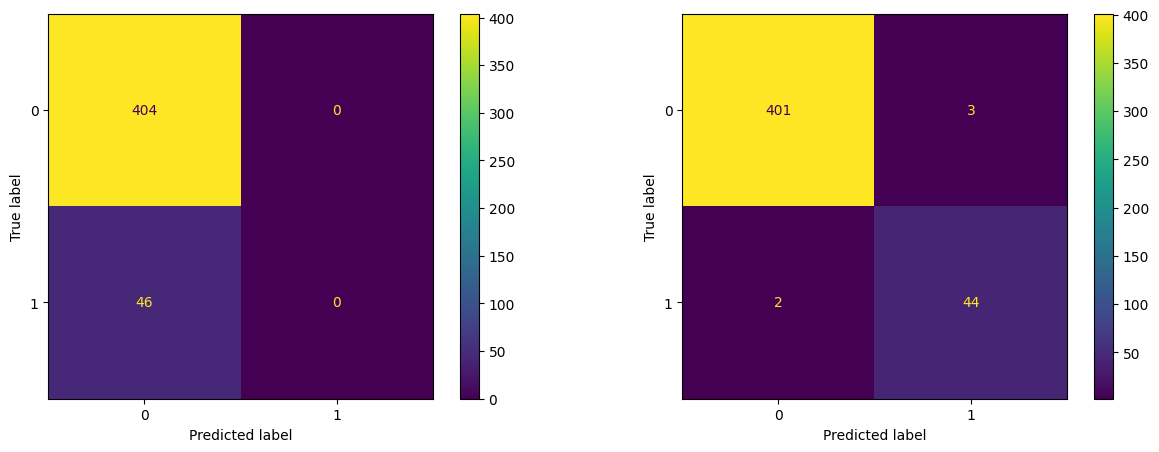

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(1,2,figsize = (15,5))


cm = confusion_matrix(y_valid, pred_dummy) # tn,fp,fn, tp 개수가 들어감
disp = ConfusionMatrixDisplay(confusion_matrix=cm) # Display 객체가 반환됨.
disp.plot(ax=ax[0]) # dummy 모델의 혼동행렬 그리기

cm = confusion_matrix(y_valid, pred_lr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax=ax[1])# logistic 모델의 혼동행렬 그리기

plt.show()

## Precision vs Recall
- FP를 줄이는 것이 목표일 때는 precision을 주로 사용
- FN을 줄이는 것이 목표일 때는 recall을 주로 사용


In [ ]:
from sklearn.metrics import precision_score , recall_score
precision_score(y_valid,pred_dummy)

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


0.0

In [ ]:
recall_score(y_valid,pred_dummy)

0.0

In [ ]:
precision_score(y_valid,pred_lr) , recall_score(y_valid,pred_lr)

(0.9361702127659575, 0.9565217391304348)

## Precision-Recall Trade-Off

In [ ]:
pred_proba = lr.predict_proba(x_valid)[:,1] # 1 에대한 확률만 필요함
pred_proba[:5]

array([1.41177877e-16, 2.92638743e-09, 1.00000000e+00, 4.40375559e-11,
       2.96759055e-07])

In [ ]:
1.24291179 * 10 ** -16 # 지수표기법

1.2429117899999998e-16

In [ ]:
threshold = 0.9
pred = np.where(pred_proba >= threshold , 1 , 0)

precision_score(y_valid,pred) , recall_score(y_valid,pred) # 정밀도는 올라가지만 재현율이 떨어진다

(0.9767441860465116, 0.9130434782608695)

In [ ]:
threshold = 0.1
pred = np.where(pred_proba > threshold , 1 , 0)

precision_score(y_valid,pred) , recall_score(y_valid,pred) # 정밀도는 떨어지지만 재현율은 올라간다

(0.9183673469387755, 0.9782608695652174)

## F1-score
- Precision과 Recall의 조화평균
- 정밀도와 재현율이 어느 한쪽으로 치우치지 않을 때 높은 값을 가진다.
- precision과 recall은 trade-off의 관계이기 때문에, 이 둘을 조화 평균한 값인 F1-score를 많이 사용
$$
F1 = 2*\frac{Precision*Recall}{Precision+Recall}
$$


- Precision = 0.1, Recall = 0.9 가정


In [ ]:
(0.1 + 0.9) / 2 # 산술 평균

0.5

In [ ]:
2 * 0.1 * 0.9 / (0.1 + 0.9) # 조화평균(F1)

0.18000000000000002

In [ ]:
from sklearn.metrics import f1_score

f1_score(y_valid,pred_dummy) , f1_score(y_valid,pred_lr)

(0.0, 0.946236559139785)

## Recall, Precision & F1 한번에 보기

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_valid, pred_lr))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       404
           1       0.94      0.96      0.95        46

    accuracy                           0.99       450
   macro avg       0.97      0.97      0.97       450
weighted avg       0.99      0.99      0.99       450



## ROC curve(Receiver Operating Characteristic curve)
- FPR(1-specificity)를 x축으로, TPR(recall)을 y축으로 하여 둘 간의 관계를 표현한 그래프
    - FPR(False Positive Rate): FP / (FP + TN)
    - TPR(True Positive Rate): TP / (FN + TP) , 재현율 recall



In [ ]:
pred_lr = lr.predict_proba(x_valid)[:,1] # 1확률만 가져오기
pred_lr[:5]

array([1.41177877e-16, 2.92638743e-09, 1.00000000e+00, 4.40375559e-11,
       2.96759055e-07])

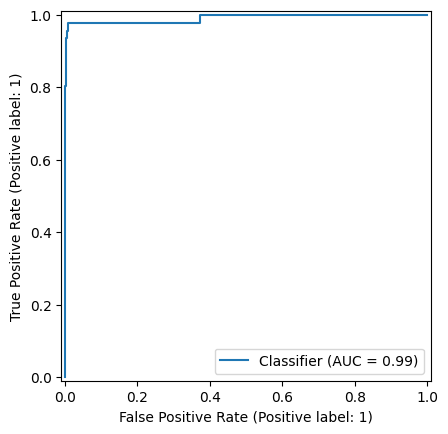

In [ ]:
from sklearn.metrics import RocCurveDisplay
fig, ax = plt.subplots()
RocCurveDisplay.from_predictions(y_valid, pred_lr, ax=ax)
plt.show()

## AUROC (ROC AUC)
- ROC curve의 밑부분 면적(area under the ROC curve; AUC)
- 넓을수록 모형 성능이 높아짐
- 임계값이 어떻게 선택되었는지와 무관하게 모델의 예측 품질을 측정
- Poor model (0.5 ~ 0.7)
- Fair model (0.7 ~ 0.8)
- Good model (0.8 ~ 0.9)
- Excellent model (0.9 ~ 1.0)


In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_valid, pred_lr)

0.9912290142057685

## Multi classification 에서의 F1-score
- micro
    - 전체 클래스의 대하여 TP/FP/FN 구한뒤에 F1-score 계산
- macro
    - 각 클래스의 대하여 F1-score 계산후 산술평균
- Weighted
    - 각 클래스의 대하여 F1-score 계산후 각 클래스가 차지하는 비율에 따라 가중평균



In [ ]:
target = digits.target  # 타겟을 다시 0~9 숫자 맞추는 다중분류로 변경

x_train, x_valid, y_train, y_valid = train_test_split(train, target, random_state=42,test_size=0.3)

x_train.shape , x_valid.shape , np.unique(y_train) , np.unique(y_valid)

((1257, 64),
 (540, 64),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]))

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=42,max_depth=5)
tree = tree.fit(x_train, y_train)
pred_tree = tree.predict(x_valid)
pred_tree.shape

(540,)

In [ ]:
print(classification_report(y_valid, pred_tree))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94        53
           1       0.50      0.16      0.24        50
           2       0.52      0.26      0.34        47
           3       0.45      0.83      0.58        54
           4       0.80      0.80      0.80        60
           5       0.97      0.85      0.90        66
           6       0.85      0.94      0.89        53
           7       0.83      0.69      0.75        55
           8       0.32      0.81      0.46        43
           9       0.81      0.29      0.42        59

    accuracy                           0.66       540
   macro avg       0.70      0.65      0.63       540
weighted avg       0.72      0.66      0.65       540



In [ ]:
from sklearn.metrics import f1_score
f1_score(y_valid, pred_tree, average='micro') , f1_score(y_valid, pred_tree, average='macro') , f1_score(y_valid, pred_tree, average='weighted')

(0.6592592592592592, 0.634001105919469, 0.6492748861763314)

- 다중분류에서 확률을 출력하는 방법
    - 소프트맥스 함수(Softmax function)
        - 각 클래스에 대한 확률을 추정
        -  입력받은 값들을 출력으로 0~1사이의 값들로 모두 정규화하며 출력 값들의 총합은 항상 1이 되는 특성을 가진 함수
$$
softmax(z) = \frac{e^{z_{i}}}{\sum_{j=1}^K e^{z_{j}}} \ \ \ for\ i=1,2,\dots,K
$$

In [ ]:
tree.predict_proba(x_valid)

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.09090909, 0.02597403, ..., 0.01298701, 0.08658009,
        0.31168831],
       [0.        , 0.09090909, 0.02597403, ..., 0.01298701, 0.08658009,
        0.31168831],
       ...,
       [1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.02439024, 0.65853659, ..., 0.        , 0.04878049,
        0.02439024],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
tree.predict_proba(x_valid).sum(axis=1) # 각 샘플에대하여 예측 확률에 합계를 보면 1

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

## Multi classification 에서의 logloss
- 모델이 예측한 확률 값을 반영하여 평가 한다.
- 0에 가까울 수록 좋은 모델이다.
- 정답에 해당하는 확률값들을 음의 로그함수에 넣어서 나온 값들을 평균내서 평가하는데 확률값이 낮을 수록 패널티를 부여하기 위함


In [ ]:
from sklearn.metrics import log_loss
pred = tree.predict_proba(x_valid)
pred

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.09090909, 0.02597403, ..., 0.01298701, 0.08658009,
        0.31168831],
       [0.        , 0.09090909, 0.02597403, ..., 0.01298701, 0.08658009,
        0.31168831],
       ...,
       [1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.02439024, 0.65853659, ..., 0.        , 0.04878049,
        0.02439024],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
log_loss(y_valid,pred) # 클래스 번호가 인덱스가 되서 해당 확률에 대한 logloss 값들을 구한다.

2.4843887516086447